In [1]:
import option as opt
import keras
import data
import network 
import matplotlib.pyplot as plt
import os
from keras.models import load_model
from keras import preprocessing

op = opt.Options()

Using TensorFlow backend.


In [2]:
def train_o () :   # 원-핫 이진 벡터 로 학습 
    tokenizer = data.get_word_index()    # 단어 인덱스를 구축
    X_total, Y_total = data.load_one_hot_data(tokenizer)   # 원-핫 이진 벡터 표현
    model = network.make_ann_model() 

    if os.path.exists(op.model_o) :
        model = load_model(op.model_o)

    callback_list = [
    keras.callbacks.EarlyStopping( #성능 향상이 멈추면 훈련을 중지
         monitor='val_loss',  #모델 검증 정확도를 모니터링
         patience=5           
    ),
    keras.callbacks.ModelCheckpoint ( #에포크마다 현재 가중치를 저장
        filepath=op.model_o, #모델 파일 경로
        monitor="val_loss",    
        save_best_only=True
    )] 
    
    history = model.fit(X_total,
                        Y_total ,
                        epochs=op.num_epochs,
                        callbacks=callback_list,
                        shuffle=True,
                        batch_size=100,
                        validation_split=0.2 )

    return history

In [3]:
def train_e():  # Embedding 으로 학습
    tokenizer = data.get_word_index()  # 단어 인덱스를 구축

    X_total, Y_total = data.load_one_word_seq(tokenizer )
    model = network.make_emd_model()

    if os.path.exists(op.model_e):
        model = load_model(op.model_e)

    callback_list = [
        keras.callbacks.EarlyStopping(  # 성능 향상이 멈추면 훈련을 중지
            monitor='val_loss',  # 모델 검증 정확도를 모니터링
            patience=5
        ),
        keras.callbacks.ModelCheckpoint(  # 에포크마다 현재 가중치를 저장
            filepath=op.model_e,  # 모델 파일 경로
            monitor="val_loss",
            save_best_only=True
        )]

    history = model.fit(X_total,
                        Y_total,
                        epochs=op.num_epochs,
                        callbacks=callback_list,
                        shuffle=True,
                        batch_size=100,
                        validation_split=0.2)

    return history

In [4]:
def train_r():  # Embedding +  RNN 으로 학습
    tokenizer = data.get_word_index()  # 단어 인덱스를 구축

    X_total, Y_total = data.load_one_word_seq(tokenizer )
    model = network.make_rnn_model()

    if os.path.exists(op.model_r):
        model = load_model(op.model_r)

    callback_list = [
        keras.callbacks.EarlyStopping(  # 성능 향상이 멈추면 훈련을 중지
            monitor='val_loss',  # 모델 검증 정확도를 모니터링
            patience=5
        ),
        keras.callbacks.ModelCheckpoint(  # 에포크마다 현재 가중치를 저장
            filepath=op.model_r,  # 모델 파일 경로
            monitor="val_loss",
            save_best_only=True
        )]

    history = model.fit(X_total,
                        Y_total,
                        epochs=op.num_epochs,
                        callbacks=callback_list,
                        shuffle=True,
                        batch_size=100,
                        validation_split=0.2)

    return history

In [5]:
def showHistoryGraph(history, title) :
    history = history.history
    """Cost/Loss  변화 추이 그래프"""
    plt.plot(history['loss'])
    plt.plot(history['val_loss'])
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Training', 'Verification'], loc=0)
    plt.title(title)
    plt.show()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 16 samples, validate on 5 samples
Epoch 1/200
16/16 [==============================] - 0s 23ms/step - loss: 2.8442e-04 - acc: 1.0000 - val_loss: 0.1225 - val_acc: 1.0000
Epoch 2/200
16/16 [==============================] - 0s 2ms/step - loss: 2.7836e-04 - acc: 1.0000 - val_loss: 0.1220 - val_acc: 1.0000
Epoch 3/200
16/16 [==============================] - 0s 312us/step - loss: 2.7243e-04 - acc: 1.0000 - val_loss: 0.1214 - val_acc: 1.0000
Epoch 4/200
16/16 [==============================] - 0s 249us/step - loss: 2.6661e-04 - acc: 1.0000 - val_loss: 0.1208 - val_acc: 1.0000
Epoch 5/200
16/16 [==============================] - 0s 249us/step - loss: 2.6090e-04 - acc: 1.0000 - val_loss: 0.1203 - val_acc: 1.0000
Epoch 6/200
16/16 [==============================] - 0s 187us/step - loss: 2.5533e-04 - acc: 1.0000 - val_loss: 0.1197 - val_acc: 1.0000
Epoch 7/200
16/16 

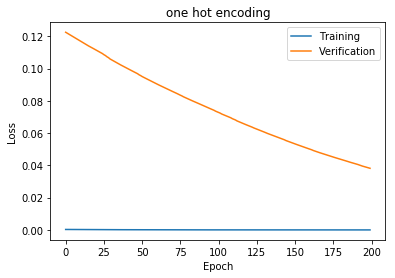

Train on 16 samples, validate on 5 samples
Epoch 1/200
16/16 [==============================] - 0s 20ms/step - loss: 8.8369e-05 - acc: 1.0000 - val_loss: 0.0713 - val_acc: 1.0000
Epoch 2/200
16/16 [==============================] - 0s 185us/step - loss: 8.5666e-05 - acc: 1.0000 - val_loss: 0.0694 - val_acc: 1.0000
Epoch 3/200
16/16 [==============================] - 0s 125us/step - loss: 8.3013e-05 - acc: 1.0000 - val_loss: 0.0707 - val_acc: 1.0000
Epoch 4/200
16/16 [==============================] - 0s 189us/step - loss: 8.0490e-05 - acc: 1.0000 - val_loss: 0.0689 - val_acc: 1.0000
Epoch 5/200
16/16 [==============================] - 0s 186us/step - loss: 7.8014e-05 - acc: 1.0000 - val_loss: 0.0702 - val_acc: 1.0000
Epoch 6/200
16/16 [==============================] - 0s 123us/step - loss: 7.5637e-05 - acc: 1.0000 - val_loss: 0.0684 - val_acc: 1.0000
Epoch 7/200
16/16 [==============================] - 0s 183us/step - loss: 7.3308e-05 - acc: 1.0000 - val_loss: 0.0696 - val_acc: 1.0000

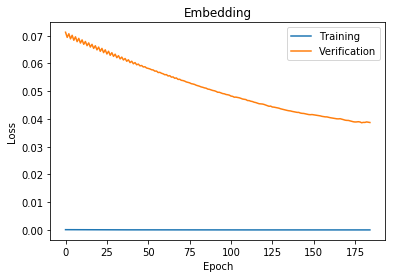

Train on 16 samples, validate on 5 samples
Epoch 1/200
16/16 [==============================] - 1s 42ms/step - loss: 0.2816 - acc: 0.8750 - val_loss: 0.3100 - val_acc: 1.0000
Epoch 2/200
16/16 [==============================] - 0s 684us/step - loss: 0.2612 - acc: 0.8750 - val_loss: 0.2162 - val_acc: 1.0000
Epoch 3/200
16/16 [==============================] - 0s 557us/step - loss: 0.2517 - acc: 0.8750 - val_loss: 0.3005 - val_acc: 1.0000
Epoch 4/200
16/16 [==============================] - 0s 623us/step - loss: 0.2390 - acc: 0.8750 - val_loss: 0.2132 - val_acc: 1.0000
Epoch 5/200
16/16 [==============================] - 0s 623us/step - loss: 0.2302 - acc: 0.8750 - val_loss: 0.3511 - val_acc: 1.0000
Epoch 6/200
16/16 [==============================] - 0s 623us/step - loss: 0.2216 - acc: 1.0000 - val_loss: 0.1505 - val_acc: 1.0000
Epoch 7/200
16/16 [==============================] - 0s 559us/step - loss: 0.2287 - acc: 0.8750 - val_loss: 0.2729 - val_acc: 1.0000
Epoch 8/200
16/16 [========

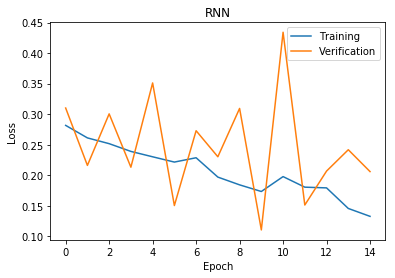

In [6]:
if __name__ == '__main__':
    # 원핫
    history = train_o ()
    showHistoryGraph(history, "one hot encoding" )

    # Embedding
    history = train_e()
    showHistoryGraph(history, "Embedding")

    # Embedding +RNN
    history = train_r()
    showHistoryGraph(history, "RNN")
